# Initialisation

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label, center_of_mass
import lmfit
from PIL import Image
%matplotlib inline

# Importer fichier

In [2]:
path_to_tiff = os.path.join("..", "acquisition", "video_output_carac_150ms_1im_1um.tiff")

tiff = Image.open(path_to_tiff)

# Move to a specific frame, e.g., frame 10
frame_index = 1
tiff.seek(frame_index)
original_image = np.array(tiff)

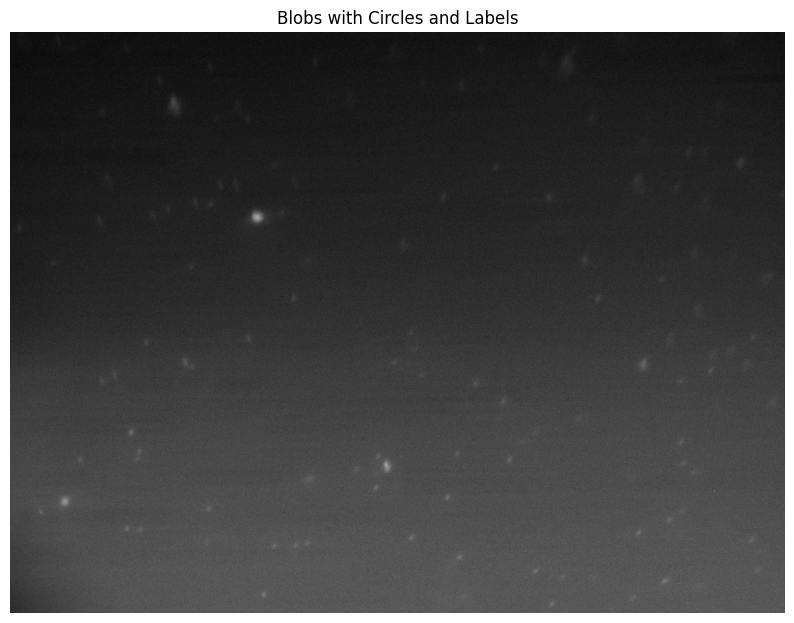

In [3]:
# Display the image with circles and labels using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(original_image, cmap = 'gray')
plt.title("Blobs with Circles and Labels")
plt.axis('off')
plt.show()

In [4]:
def normalize_image(image):
    # Find the minimum and maximum pixel values in the image
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Normalize the image to the range [0, 255]
    normalized_image = ((image - min_val) / (max_val - min_val)) * 255
    
    # Convert to uint8 (8-bit image) to ensure pixel values are within valid range
    return normalized_image.astype(np.uint8)

In [5]:
def blob_circling(
    original_image, preprocessed_image, blob_radius=10, connectivity=3
):
    # normalization
    preprocessed_norm = normalize_image(preprocessed_image)
    
    # Threshold to create a binary image
    _, binary = cv2.threshold(preprocessed_norm, 150, 255, cv2.THRESH_BINARY)
    # Detect blobs using connected-component analysis
    structure = np.ones((connectivity, connectivity), dtype=int)  # Define connectivity
    labeled, num_features = label(binary, structure=structure)

    # Get blob centers
    blob_centers = center_of_mass(binary, labeled, range(1, num_features + 1))

    # Clone the original image to draw circles and labels on it
    image_with_circles = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color circles

    # Draw circles and labels around each blob center
    for i, center in enumerate(blob_centers):
        x, y = int(center[0]), int(center[1])
        cv2.circle(image_with_circles, (y, x), blob_radius, (0, 0, 255), 2)  # Red circle
        label_text = str(i + 1)  # Label as the index of the blob
        cv2.putText(image_with_circles, label_text, (y + 15, x), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    return image_with_circles, blob_centers

In [6]:
def plot_image(image, title="Image"):
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

In [7]:
def preprocess_image(image, method="gaussian", blur_kernel=31, threshold_value=127):
    if method == "gaussian":
        blurred = cv2.GaussianBlur(image, (blur_kernel, blur_kernel), 0)
        preprocessed = cv2.subtract(image, blurred)
    elif method == "median":
        blurred = cv2.medianBlur(image, blur_kernel)
        preprocessed = cv2.subtract(image, blurred)
    elif method == "clahe":
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(10, 10))
        preprocessed = clahe.apply(image)
    else:
        raise ValueError("Invalid preprocessing method. Choose 'gaussian', 'median', or 'clahe'.")
    
    # Optional: Apply thresholding for binarization
    _, preprocessed = cv2.threshold(preprocessed, threshold_value, 255, cv2.THRESH_BINARY)
    return preprocessed

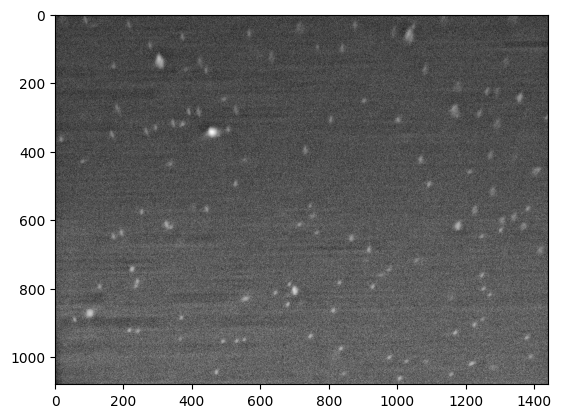

In [8]:
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(30, 30))
preprocessed = clahe.apply(original_image)
plt.imshow(preprocessed, cmap='gray')

In [9]:
preprocessed

array([[ 42,  63,  42, ...,  51,  51,  40],
       [ 84,  31,  42, ...,  51,  51,  40],
       [ 42,  42,  42, ...,  82,  82,  82],
       ...,
       [ 78,  78,  89, ...,  97,  97, 118],
       [ 68,  57,  36, ...,  86,  97,  45],
       [ 26,  31,  27, ...,  86, 139, 118]], dtype=uint8)

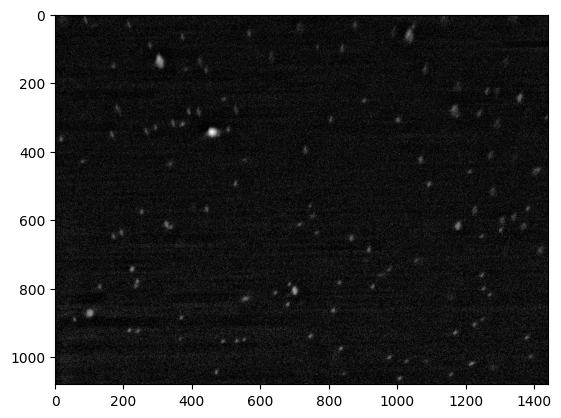

In [10]:
blurred = cv2.medianBlur(preprocessed, 115)
preprocessed2 = cv2.subtract(preprocessed, blurred)
plt.imshow(preprocessed2, cmap='gray')

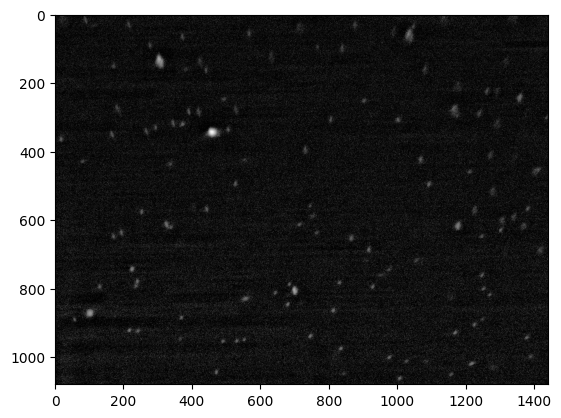

In [20]:
blurred = cv2.medianBlur(preprocessed2, 115)
preprocessed3 = cv2.subtract(preprocessed2, blurred)
plt.imshow(preprocessed3, cmap='gray')

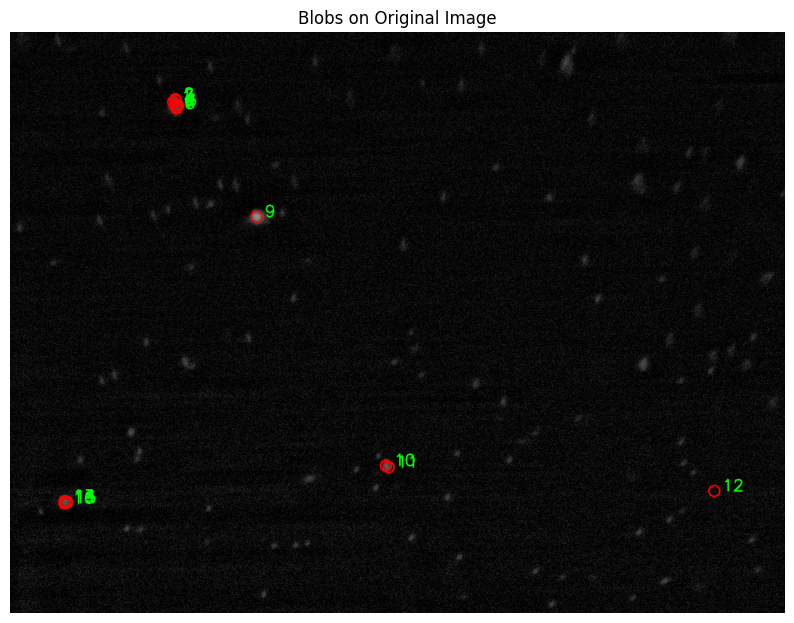

In [21]:
result_image, centers = blob_circling(preprocessed3, preprocessed3, blob_radius=10)

# Plot the result
plot_image(result_image, title="Blobs on Original Image")